In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, date, timedelta
from tqdm.notebook import tqdm 

# 한글 시각화 설정
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
rc('font', family=font_name)

C:\Users\kms10\AppData\Local\Temp\ipykernel_9712\4137485784.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/


In [2]:
df = pd.read_csv('weather_electric_data.csv')
df['일시'] = pd.to_datetime(df['일시'])
df.set_index('일시', drop=True, inplace=True)

## 단일변수 분석

In [7]:
df_by_weather_info = []
for j in range(9):
    df_by_weather_info.append(df.iloc[:,[9*i+j for i in range(16)]])

### 현재수요

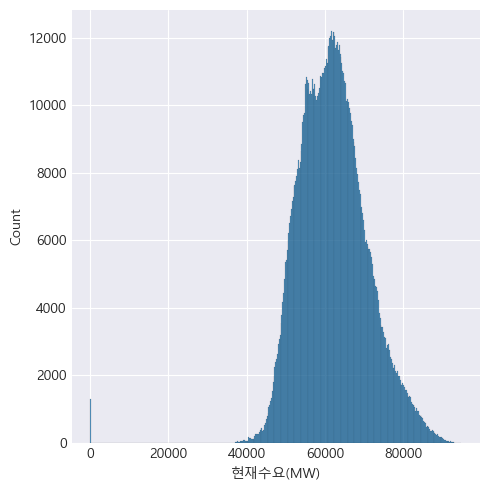

In [8]:
# 현재수요 분포
sns.displot(df['현재수요(MW)'])

- 현재수요가 0인 데이터 처리 필요
- 이전 행으로 대체하기

In [9]:
df[df['현재수요(MW)'] == 0]

,서울_기온(°C),서울_누적강수량(mm),서울_풍향(deg),서울_풍속(m/s),서울_현지기압(hPa),서울_해면기압(hPa),서울_습도(%),서울_일사(MJ/m^2),서울_일조(Sec),인천_기온(°C),...,천안_일조(Sec),공급능력(MW),현재수요(MW),공급예비력(MW),운영예비력(MW),요일,is_holiday_or_weekend,요일1,요일2,요일3
일시,,,,,,,,,,,,,,,,,,,,,
2022-04-08 09:10:00,10.6,0.0,329.5,0.6,1011.3,1021.7,55.7,2.66,9180.0,10.2,...,9714.0,0.0,0.0,0.0,0.0,4,0,1,0,1
2022-04-08 09:15:00,10.7,0.0,159.7,0.3,1011.4,1021.8,55.2,2.80,9480.0,10.3,...,10015.0,0.0,0.0,0.0,0.0,4,0,1,0,1
2022-04-11 02:35:00,14.1,0.0,32.5,1.5,1005.3,1015.5,67.4,0.00,0.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
2022-04-12 08:00:00,17.9,0.0,255.7,2.8,1001.4,1011.4,83.8,0.23,0.0,16.3,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
2022-04-14 16:55:00,15.1,0.0,55.4,3.3,1007.5,1017.7,49.2,8.90,0.0,14.5,...,108.0,0.0,0.0,0.0,0.0,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-15 21:40:00,6.0,0.0,302.2,4.1,1013.0,1023.6,39.3,5.62,4320.0,4.9,...,22716.0,0.0,0.0,0.0,0.0,2,0,0,1,1
2023-03-15 21:45:00,5.8,0.0,320.8,5.4,1013.2,1023.8,37.8,5.62,4320.0,4.8,...,22716.0,0.0,0.0,0.0,0.0,2,0,0,1,1
2023-03-16 00:50:00,3.0,0.0,319.4,4.0,1015.6,1026.4,37.0,0.00,0.0,2.6,...,0.0,0.0,0.0,0.0,0.0,3,0,1,0,0


In [ ]:
error_date = df[df['현재수요(MW)'] == 0].index

for i in tqdm(range(len(error_date))):
    df.loc[error_date[i], '현재수요(MW)'] = df.loc[error_date[i] - timedelta(minutes=5), '현재수요(MW)']
    print(error_date[i], df.loc[error_date[i] - timedelta(minutes=5), '현재수요(MW)'])

### 기온

In [13]:
df_by_weather_info[0].describe().round(1)

,서울_기온(°C),인천_기온(°C),원주_기온(°C),수원_기온(°C),청주_기온(°C),대전_기온(°C),포항_기온(°C),대구_기온(°C),전주_기온(°C),울산_기온(°C),창원_기온(°C),광주_기온(°C),부산_기온(°C),여수_기온(°C),제주_기온(°C),천안_기온(°C)
count,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0
mean,13.2,12.8,12.7,13.0,13.8,13.7,15.0,14.7,14.1,14.7,14.7,14.6,15.4,15.1,16.8,12.3
std,11.2,10.5,11.1,11.0,10.9,10.8,9.4,10.2,10.3,9.2,9.3,9.9,8.6,8.8,8.0,11.0
min,-199.9,-17.5,-20.3,-18.6,-16.9,-17.7,-13.9,-14.1,-16.5,-13.6,-14.0,-13.5,-12.2,-199.9,-5.3,-20.5
25%,4.0,4.1,3.3,3.8,4.6,4.7,7.5,6.1,5.4,7.4,7.0,6.3,8.7,7.9,10.0,3.1
50%,14.3,13.7,13.7,13.8,14.7,14.5,15.9,15.5,14.8,15.5,15.5,15.5,16.3,16.0,17.2,13.1
75%,22.8,22.0,22.3,22.5,23.2,22.9,22.5,23.0,22.9,22.1,22.4,23.0,22.3,22.4,23.2,21.8
max,39.5,36.0,38.7,39.2,38.9,39.4,39.4,39.2,38.9,38.6,38.5,38.5,37.3,38.6,37.4,37.8


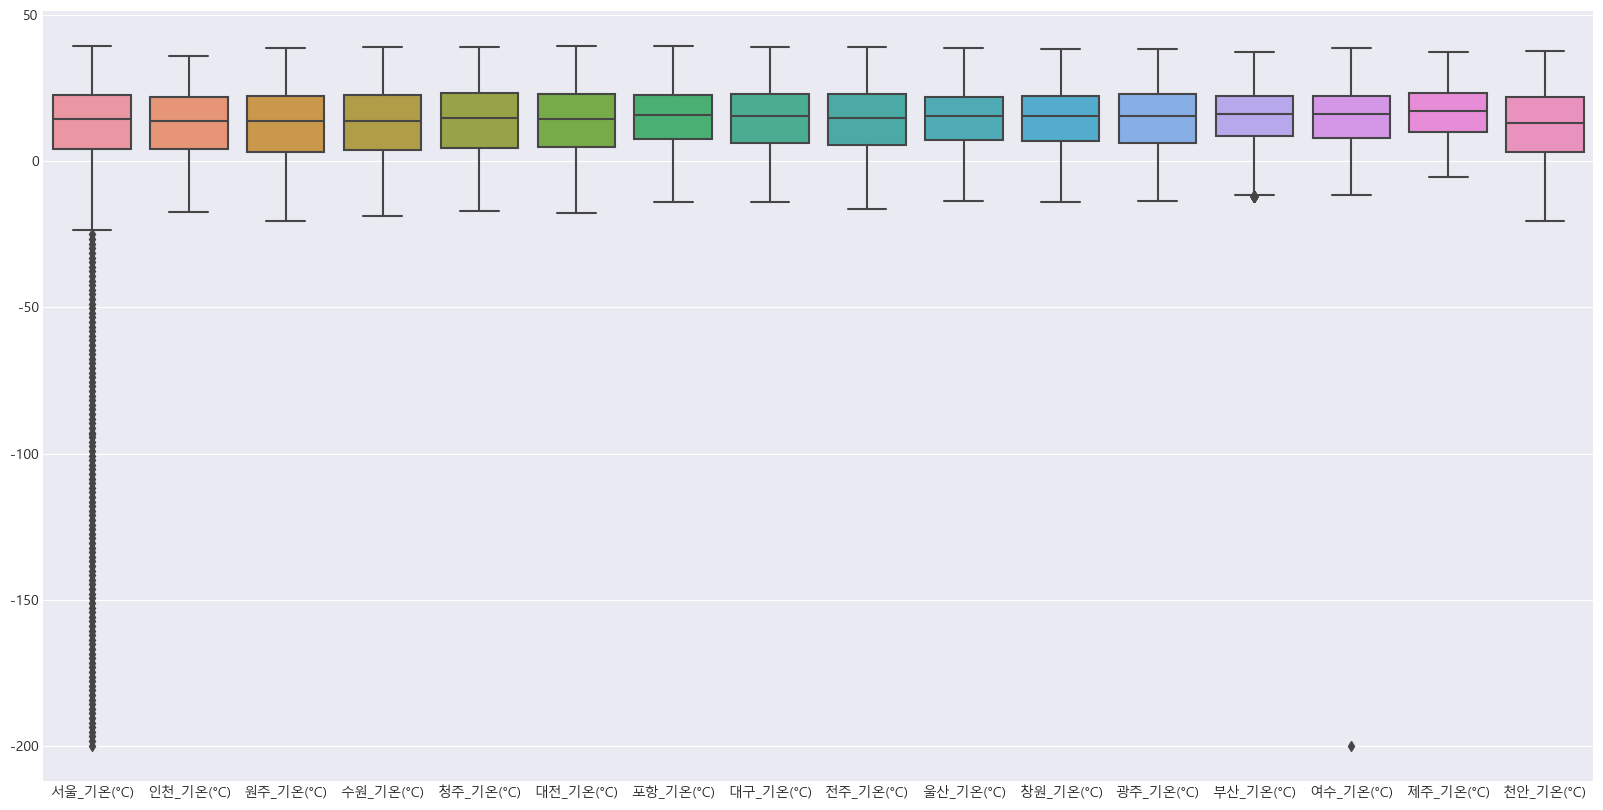

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(df_by_weather_info[0])
plt.show()

- 서울과 여수에서 최소값이 -199.9도로 비정상적인 데이터가 존재하는 것을 확인
- 대부분의 다른 도시에서 영하 20도 내에서 최소값이 형성되므로 영하 20도보다 낮은 데이터 확인

In [15]:
df[(df['서울_기온(°C)'] < -20) | (df['여수_기온(°C)'] < -20)][['서울_기온(°C)', '여수_기온(°C)']]

,서울_기온(°C),여수_기온(°C)
일시,,
2017-03-22 13:35:00,12.400,-199.9
2017-11-05 13:00:00,-93.200,14.0
2017-11-05 13:05:00,-199.900,14.0
2017-11-05 13:10:00,-198.325,14.0
2017-11-05 13:15:00,-196.750,14.1
...,...,...
2017-11-05 22:15:00,-26.650,11.0
2017-11-05 22:20:00,-25.075,11.0
2017-11-05 22:25:00,-23.500,11.0


- 여수 : 170322 1개 행, 서울 : 171105 다수 행에서 문제
- 재수집 결과, 기상청 데이터 자체에서 문제
    - 여수는 앞뒤 정상적인 온도로 대체
    - 서울은 전날 같은 시간의 온도로 대체

In [16]:
df.loc['2017-03-22 13:35:00', '여수_기온(°C)'] = np.mean([df.loc['2017-03-22 13:30:00', '여수_기온(°C)'], df.loc['2017-03-22 13:40:00', '여수_기온(°C)']])
df.loc['2017-11-05 13:00:00' : '2017-11-06 00:00:00', '서울_기온(°C)'] = df.loc['2017-11-04 13:00:00' : '2017-11-05 00:00:00', '서울_기온(°C)'].values
df.iloc[:,[9*i+0 for i in range(16)]].describe().round(1)

## 누적강수량

In [19]:
df_by_weather_info[1].describe().round(1)

,서울_누적강수량(mm),인천_누적강수량(mm),원주_누적강수량(mm),수원_누적강수량(mm),청주_누적강수량(mm),대전_누적강수량(mm),포항_누적강수량(mm),대구_누적강수량(mm),전주_누적강수량(mm),울산_누적강수량(mm),창원_누적강수량(mm),광주_누적강수량(mm),부산_누적강수량(mm),여수_누적강수량(mm),제주_누적강수량(mm),천안_누적강수량(mm)
count,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0
mean,1.7,1.6,1.6,1.8,1.6,1.7,1.7,1.4,1.7,1.7,2.0,1.8,2.2,2.0,2.2,1.6
std,8.5,8.2,8.0,9.7,8.0,7.9,9.5,7.0,7.7,8.8,9.7,8.4,10.8,10.0,10.6,8.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,176.2,207.8,255.5,285.0,290.2,192.9,342.4,168.2,381.3,266.0,246.5,260.6,264.1,308.9,310.0,232.7


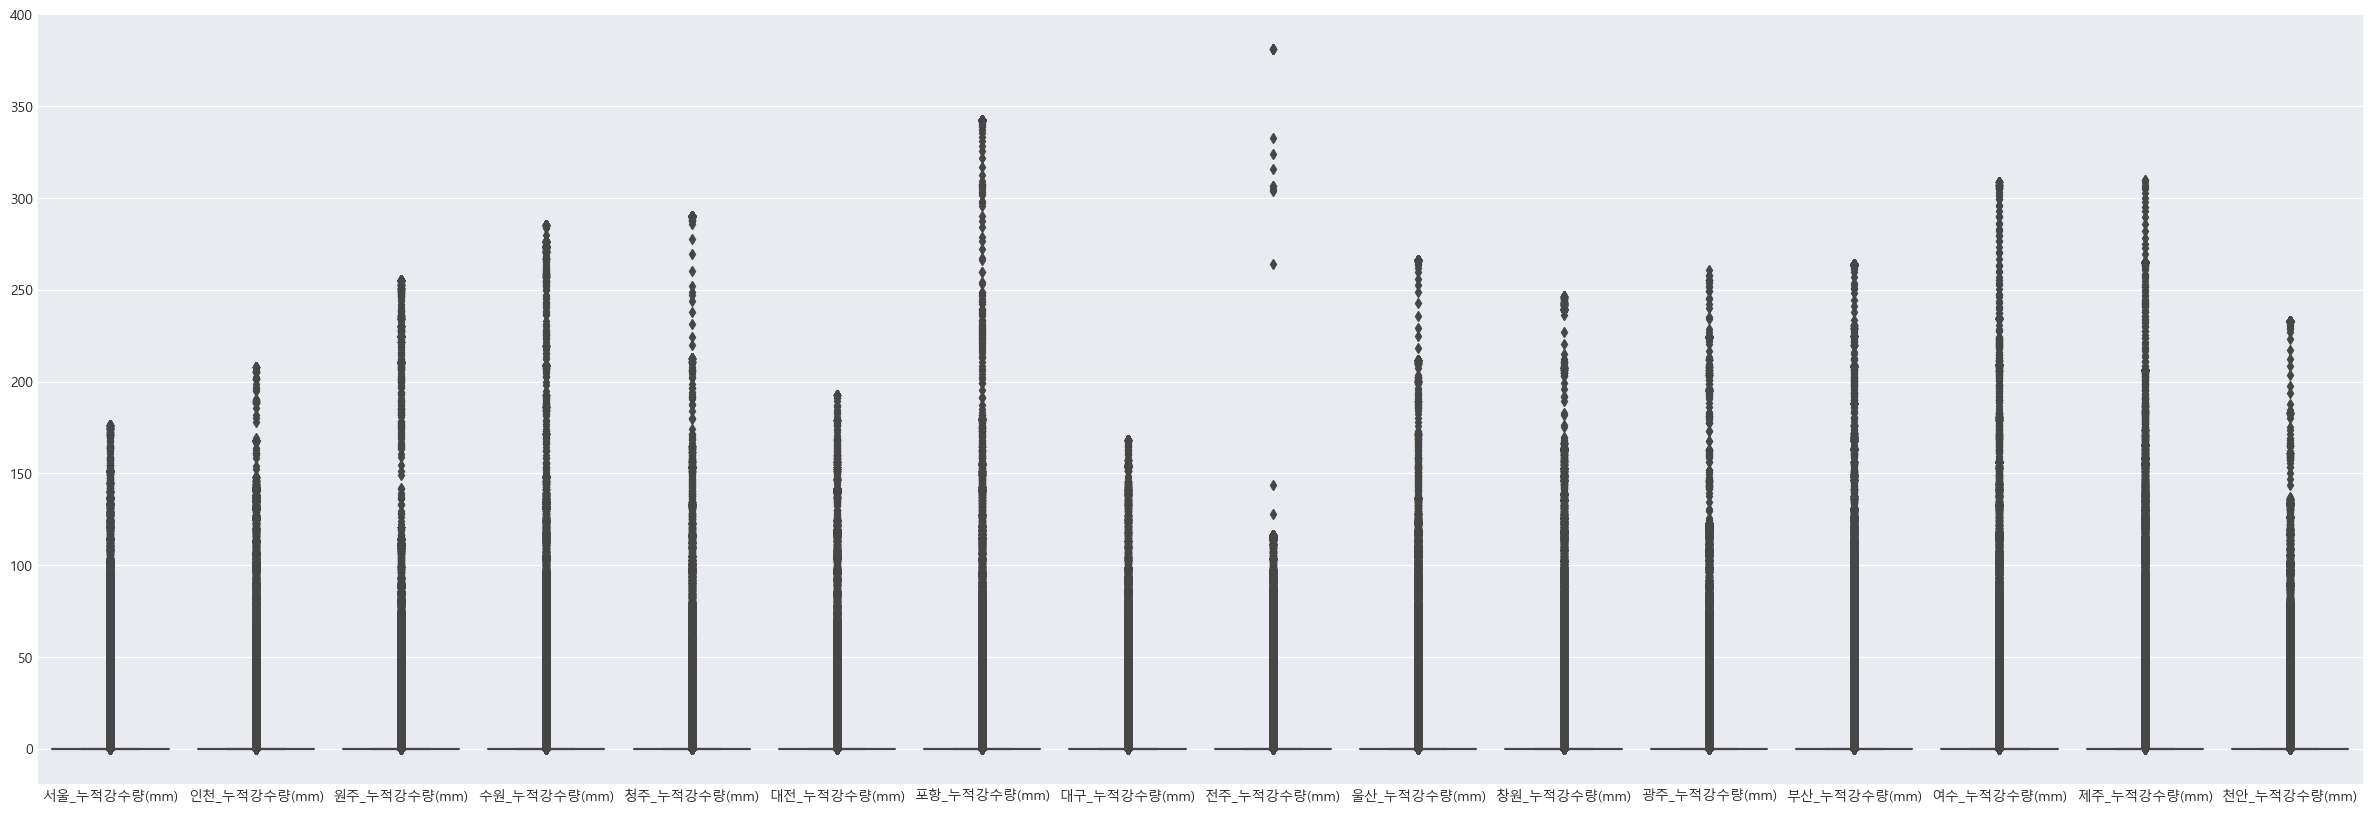

In [20]:
plt.figure(figsize=(30,10))
sns.boxplot(df_by_weather_info[1])
plt.show()

### 풍향

In [21]:
df_by_weather_info[2].describe().round(1)

,서울_풍향(deg),인천_풍향(deg),원주_풍향(deg),수원_풍향(deg),청주_풍향(deg),대전_풍향(deg),포항_풍향(deg),대구_풍향(deg),전주_풍향(deg),울산_풍향(deg),창원_풍향(deg),광주_풍향(deg),부산_풍향(deg),여수_풍향(deg),제주_풍향(deg),천안_풍향(deg)
count,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0
mean,188.7,202.4,171.9,194.2,202.6,197.0,193.6,190.8,196.4,202.4,164.1,157.4,171.0,175.3,178.1,169.2
std,109.5,110.4,105.8,102.5,106.2,115.3,104.1,105.4,97.8,122.8,108.8,108.3,109.5,107.8,112.2,103.9
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.9,0.0,0.0
25%,64.6,116.5,69.2,111.3,132.9,101.7,76.7,108.3,126.4,79.7,52.6,46.9,57.6,74.7,67.0,88.9
50%,231.0,222.0,195.4,212.1,237.4,210.2,232.9,176.7,196.8,230.8,164.9,180.1,193.1,191.0,181.6,166.5
75%,281.1,297.9,258.8,280.8,287.1,307.9,259.1,290.4,278.8,317.7,258.2,249.3,266.6,273.2,283.4,264.3
max,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0


- 여수에서 최소 풍향이 -99.9로 잘못된 것을 확인

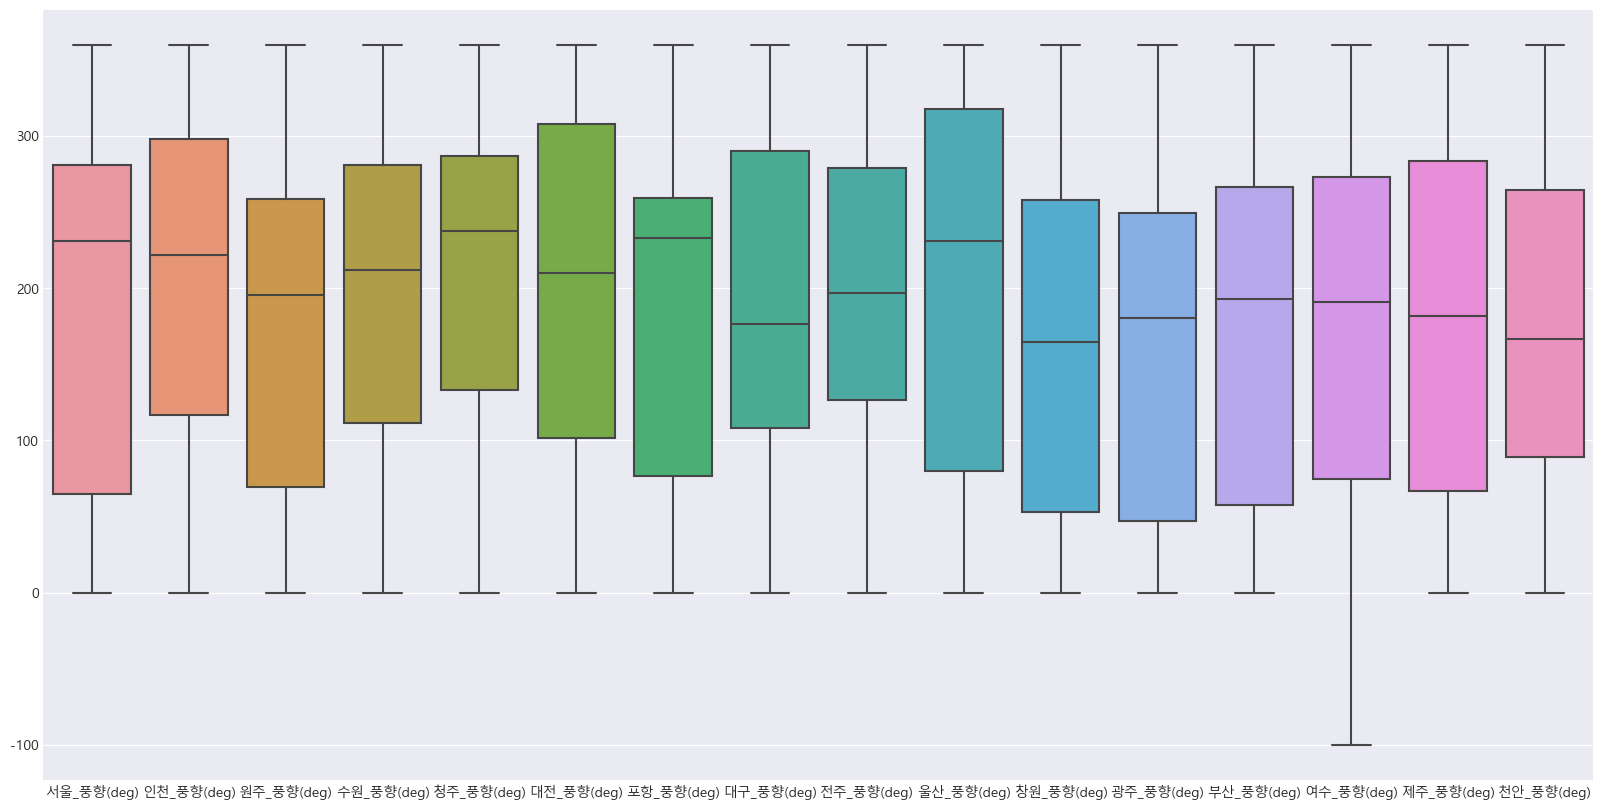

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(df_by_weather_info[2])
plt.show()

In [23]:
df.loc[df['여수_풍향(deg)'] < 0, '여수_풍향(deg)']

일시
2017-03-22 11:20:00    -3.567857
2017-03-22 11:25:00    -7.135714
2017-03-22 11:30:00   -10.703571
2017-03-22 11:35:00   -14.271429
2017-03-22 11:40:00   -17.839286
                         ...    
2017-03-22 18:55:00    -7.239130
2017-03-22 19:00:00    -5.791304
2017-03-22 19:05:00    -4.343478
2017-03-22 19:10:00    -2.895652
2017-03-22 19:15:00    -1.447826
Name: 여수_풍향(deg), Length: 96, dtype: float64

- 170322 모두 전날 (170321) 데이터 사용

In [24]:
df.loc['2017-03-22', '여수_풍향(deg)'] = df.loc['2017-03-21', '여수_풍향(deg)'].values

In [25]:
df.iloc[:,[9*i+2 for i in range(16)]].describe().round(1)

,서울_풍향(deg),인천_풍향(deg),원주_풍향(deg),수원_풍향(deg),청주_풍향(deg),대전_풍향(deg),포항_풍향(deg),대구_풍향(deg),전주_풍향(deg),울산_풍향(deg),창원_풍향(deg),광주_풍향(deg),부산_풍향(deg),여수_풍향(deg),제주_풍향(deg),천안_풍향(deg)
count,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0
mean,188.7,202.4,171.9,194.2,202.6,197.0,193.6,190.8,196.4,202.4,164.1,157.4,171.0,175.4,178.1,169.2
std,109.5,110.4,105.8,102.5,106.2,115.3,104.1,105.4,97.8,122.8,108.8,108.3,109.5,107.8,112.2,103.9
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,64.6,116.5,69.2,111.3,132.9,101.7,76.7,108.3,126.4,79.7,52.6,46.9,57.6,74.7,67.0,88.9
50%,231.0,222.0,195.4,212.1,237.4,210.2,232.9,176.7,196.8,230.8,164.9,180.1,193.1,191.1,181.6,166.5
75%,281.1,297.9,258.8,280.8,287.1,307.9,259.1,290.4,278.8,317.7,258.2,249.3,266.6,273.3,283.4,264.3
max,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0


### 풍속

In [26]:
df_by_weather_info[3].describe().round(1)

,서울_풍속(m/s),인천_풍속(m/s),원주_풍속(m/s),수원_풍속(m/s),청주_풍속(m/s),대전_풍속(m/s),포항_풍속(m/s),대구_풍속(m/s),전주_풍속(m/s),울산_풍속(m/s),창원_풍속(m/s),광주_풍속(m/s),부산_풍속(m/s),여수_풍속(m/s),제주_풍속(m/s),천안_풍속(m/s)
count,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0
mean,2.3,3.0,1.2,1.8,1.4,1.5,2.6,2.1,1.6,2.1,1.7,1.6,3.2,3.9,3.2,1.6
std,1.4,1.7,1.0,1.4,1.0,1.2,1.4,1.6,1.2,1.4,1.3,1.3,1.9,2.7,2.0,1.4
min,-99.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.9,0.0,0.0
25%,1.3,1.8,0.4,0.8,0.7,0.7,1.6,0.9,0.8,1.1,0.7,0.7,1.8,1.9,1.7,0.5
50%,2.1,2.7,0.9,1.6,1.2,1.3,2.4,1.8,1.4,1.9,1.4,1.3,2.9,3.5,2.8,1.2
75%,3.1,3.9,1.6,2.6,2.0,2.1,3.4,3.1,2.2,3.0,2.4,2.3,4.2,5.4,4.3,2.3
max,15.9,25.3,12.5,17.3,11.7,17.3,17.3,16.9,17.2,19.3,19.9,17.8,22.8,31.2,34.0,17.2


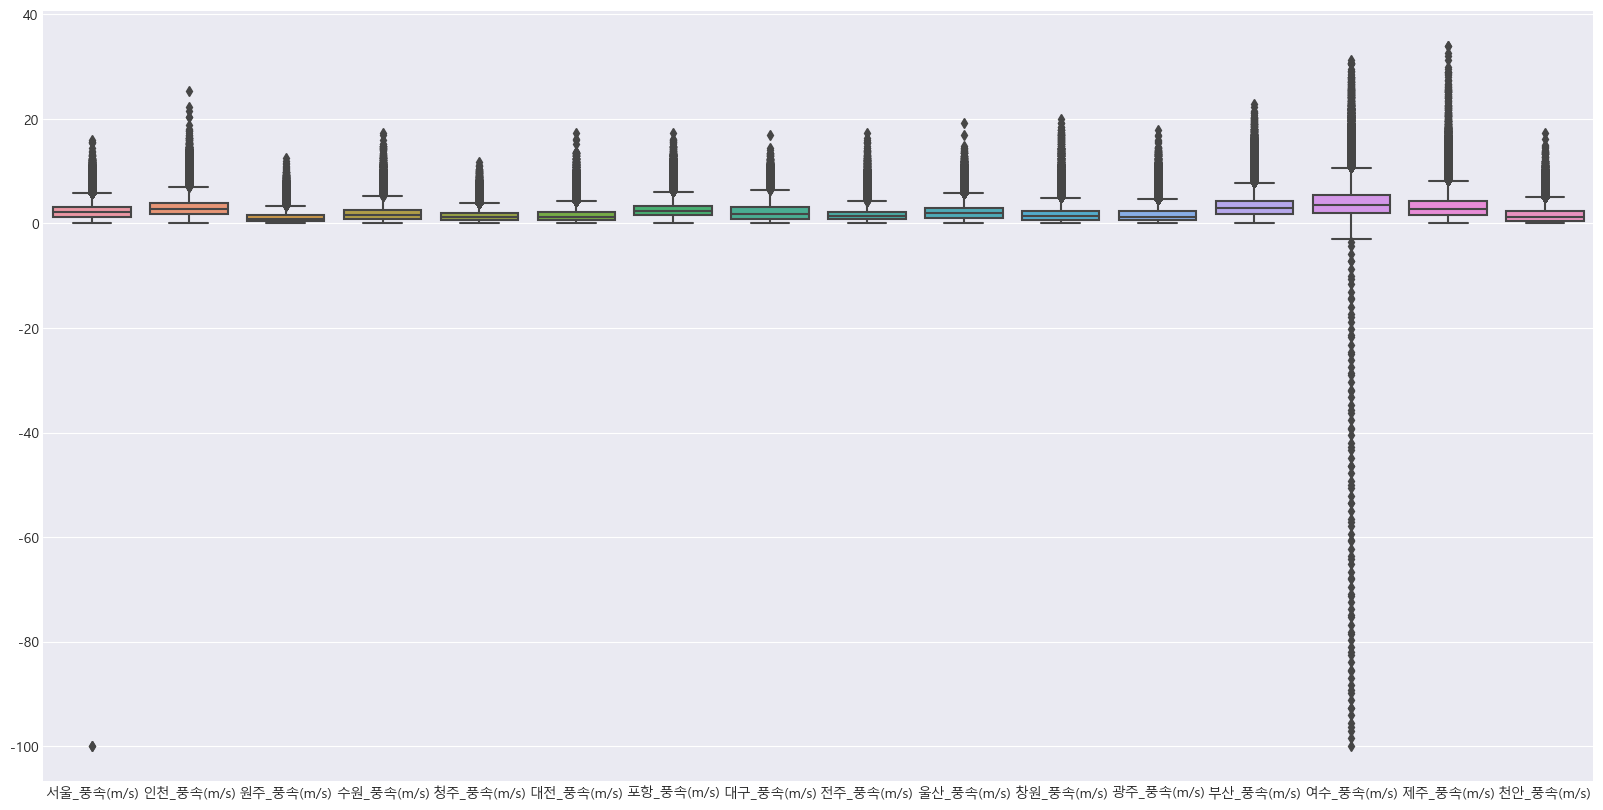

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(df_by_weather_info[3])
plt.show()

- 서울, 여수 처리 필요

In [28]:
df[(df['서울_풍속(m/s)'] < 0) | (df['여수_풍속(m/s)'] < 0)][['서울_풍속(m/s)', '여수_풍속(m/s)']]

,서울_풍속(m/s),여수_풍속(m/s)
일시,,
2017-03-22 11:20:00,3.3,-3.567857
2017-03-22 11:25:00,2.9,-7.135714
2017-03-22 11:30:00,2.5,-10.703571
2017-03-22 11:35:00,1.6,-14.271429
2017-03-22 11:40:00,2.9,-17.839286
...,...,...
2017-03-22 19:05:00,3.8,-4.343478
2017-03-22 19:10:00,4.4,-2.895652
2017-03-22 19:15:00,4.0,-1.447826


- 서울은 앞 행으로 대체
- 여수는 전날로 대체

In [29]:
df.loc['2017-10-14 18:15:00':'2017-10-14 18:20:00', '서울_풍속(m/s)'] = np.mean([df.loc['2017-10-14 18:10:00', '서울_풍속(m/s)'], df.loc['2017-10-14 18:25:00','서울_풍속(m/s)']])

In [30]:
df.loc['2017-03-22', '여수_풍속(m/s)'] = df.loc['2017-03-21', '여수_풍속(m/s)'].values

In [31]:
df.iloc[:,[9*i+3 for i in range(16)]].describe().round(1)

,서울_풍속(m/s),인천_풍속(m/s),원주_풍속(m/s),수원_풍속(m/s),청주_풍속(m/s),대전_풍속(m/s),포항_풍속(m/s),대구_풍속(m/s),전주_풍속(m/s),울산_풍속(m/s),창원_풍속(m/s),광주_풍속(m/s),부산_풍속(m/s),여수_풍속(m/s),제주_풍속(m/s),천안_풍속(m/s)
count,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0
mean,2.3,3.0,1.2,1.8,1.4,1.5,2.6,2.1,1.6,2.1,1.7,1.6,3.2,3.9,3.2,1.6
std,1.4,1.7,1.0,1.4,1.0,1.2,1.4,1.6,1.2,1.4,1.3,1.3,1.9,2.6,2.0,1.4
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.3,1.8,0.4,0.8,0.7,0.7,1.6,0.9,0.8,1.1,0.7,0.7,1.8,1.9,1.7,0.5
50%,2.1,2.7,0.9,1.6,1.2,1.3,2.4,1.8,1.4,1.9,1.4,1.3,2.9,3.5,2.8,1.2
75%,3.1,3.9,1.6,2.6,2.0,2.1,3.4,3.1,2.2,3.0,2.4,2.3,4.2,5.4,4.3,2.3
max,15.9,25.3,12.5,17.3,11.7,17.3,17.3,16.9,17.2,19.3,19.9,17.8,22.8,31.2,34.0,17.2


### 현지기압

In [32]:
df_by_weather_info[4].describe().round(1)

,서울_현지기압(hPa),인천_현지기압(hPa),원주_현지기압(hPa),수원_현지기압(hPa),청주_현지기압(hPa),대전_현지기압(hPa),포항_현지기압(hPa),대구_현지기압(hPa),전주_현지기압(hPa),울산_현지기압(hPa),창원_현지기압(hPa),광주_현지기압(hPa),부산_현지기압(hPa),여수_현지기압(hPa),제주_현지기압(hPa),천안_현지기압(hPa)
count,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0
mean,1006.1,1008.1,998.6,1012.4,1009.7,1008.6,1015.7,1009.7,1009.5,1008.1,1011.6,1008.1,1007.5,1008.2,1014.2,1009.3
std,8.1,8.2,7.8,8.3,8.3,8.2,7.8,7.9,8.2,8.0,7.7,8.0,7.4,10.6,8.0,8.8
min,974.6,973.5,960.9,980.2,974.5,973.6,960.8,958.8,976.3,951.7,957.0,974.9,765.7,-99.9,971.4,973.7
25%,999.7,1001.6,992.4,1005.8,1003.1,1002.1,1009.7,1003.5,1003.1,1002.2,1005.7,1001.8,1001.9,1002.5,1007.8,1002.6
50%,1006.3,1008.3,998.8,1012.6,1009.8,1008.7,1016.0,1009.9,1009.8,1008.2,1011.8,1008.4,1007.6,1008.5,1014.4,1009.2
75%,1012.4,1014.5,1004.6,1018.9,1016.1,1014.9,1021.7,1015.8,1015.8,1013.9,1017.5,1014.4,1013.1,1014.2,1020.4,1015.8
max,1028.3,1030.4,1020.2,1035.4,1032.1,1030.8,1036.9,1031.3,1032.8,1031.8,1032.6,1029.8,1027.3,1029.1,1036.0,1036.3


- 여수 처리, 부산 확인 필요

In [33]:
df.loc[df['여수_현지기압(hPa)'] < 950, '여수_현지기압(hPa)']

일시
2017-03-22 11:25:00    933.971429
2017-03-22 11:30:00    894.207143
2017-03-22 11:35:00    854.442857
2017-03-22 11:40:00    814.678571
2017-03-22 11:45:00    774.914286
                          ...    
2017-03-22 23:05:00    906.195238
2017-03-22 23:10:00    915.020635
2017-03-22 23:15:00    923.846032
2017-03-22 23:20:00    932.671429
2017-03-22 23:25:00    941.496825
Name: 여수_현지기압(hPa), Length: 145, dtype: float64

- 전날로 대체

In [34]:
df.loc['2017-03-22', '여수_현지기압(hPa)'] = df.loc['2017-03-21', '여수_현지기압(hPa)'].values

In [35]:
df.loc[df['부산_현지기압(hPa)'] < 950, '부산_현지기압(hPa)']

일시
2020-03-10 10:35:00    828.5
2022-11-17 11:00:00    765.7
Name: 부산_현지기압(hPa), dtype: float64

- 5분전으로 대체

In [36]:
df.loc['2020-03-10 10:35:00', '부산_현지기압(hPa)'] = df.loc['2020-03-10 10:30:00', '부산_현지기압(hPa)']
df.loc['2022-11-17 11:00:00', '부산_현지기압(hPa)'] = df.loc['2022-11-17 10:55:00', '부산_현지기압(hPa)']

In [37]:
df.iloc[:,[9*i+4 for i in range(16)]].describe().round(1)

,서울_현지기압(hPa),인천_현지기압(hPa),원주_현지기압(hPa),수원_현지기압(hPa),청주_현지기압(hPa),대전_현지기압(hPa),포항_현지기압(hPa),대구_현지기압(hPa),전주_현지기압(hPa),울산_현지기압(hPa),창원_현지기압(hPa),광주_현지기압(hPa),부산_현지기압(hPa),여수_현지기압(hPa),제주_현지기압(hPa),천안_현지기압(hPa)
count,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0
mean,1006.1,1008.1,998.6,1012.4,1009.7,1008.6,1015.7,1009.7,1009.5,1008.1,1011.6,1008.1,1007.5,1008.3,1014.2,1009.3
std,8.1,8.2,7.8,8.3,8.3,8.2,7.8,7.9,8.2,8.0,7.7,8.0,7.4,7.6,8.0,8.8
min,974.6,973.5,960.9,980.2,974.5,973.6,960.8,958.8,976.3,951.7,957.0,974.9,950.1,959.6,971.4,973.7
25%,999.7,1001.6,992.4,1005.8,1003.1,1002.1,1009.7,1003.5,1003.1,1002.2,1005.7,1001.8,1001.9,1002.5,1007.8,1002.6
50%,1006.3,1008.3,998.8,1012.6,1009.8,1008.7,1016.0,1009.9,1009.8,1008.2,1011.8,1008.4,1007.6,1008.5,1014.4,1009.2
75%,1012.4,1014.5,1004.6,1018.9,1016.1,1014.9,1021.7,1015.8,1015.8,1013.9,1017.5,1014.4,1013.1,1014.2,1020.4,1015.8
max,1028.3,1030.4,1020.2,1035.4,1032.1,1030.8,1036.9,1031.3,1032.8,1031.8,1032.6,1029.8,1027.3,1029.1,1036.0,1036.3


### 해면기압

In [38]:
df_by_weather_info[5].describe().round(1)

,서울_해면기압(hPa),인천_해면기압(hPa),원주_해면기압(hPa),수원_해면기압(hPa),청주_해면기압(hPa),대전_해면기압(hPa),포항_해면기압(hPa),대구_해면기압(hPa),전주_해면기압(hPa),울산_해면기압(hPa),창원_해면기압(hPa),광주_해면기압(hPa),부산_해면기압(hPa),여수_해면기압(hPa),제주_해면기압(hPa),천안_해면기압(hPa)
count,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0
mean,1016.3,1016.4,1016.4,1016.7,1016.5,1016.9,1016.1,1016.4,1016.6,1015.9,1016.0,1016.7,1015.7,1016.0,1016.6,1016.6
std,11.1,8.5,8.6,8.5,8.5,8.5,7.8,8.1,8.4,7.8,7.8,8.3,7.6,10.8,8.1,8.6
min,-99.8,980.9,977.4,984.1,980.9,681.5,961.2,964.7,983.2,960.7,961.1,982.9,772.0,-99.8,973.6,982.8
25%,1009.5,1009.7,1009.5,1009.9,1009.7,1010.1,1010.1,1010.0,1009.8,1009.9,1009.9,1010.1,1009.9,1010.0,1010.2,1009.8
50%,1016.6,1016.6,1016.5,1016.9,1016.7,1017.0,1016.4,1016.6,1016.8,1016.1,1016.1,1016.9,1015.9,1016.2,1016.9,1016.7
75%,1023.0,1023.1,1023.0,1023.4,1023.2,1023.5,1022.1,1022.7,1023.1,1021.8,1022.0,1023.2,1021.6,1022.1,1022.9,1023.3
max,1039.7,1039.6,1040.1,1040.0,1039.9,1040.1,1037.4,1038.7,1039.9,1036.8,1037.1,1039.1,1036.2,1037.6,1038.6,1040.1


- 서울, 여수 처리 필요
- 대전, 부산 확인 필요

In [39]:
df[(df['서울_해면기압(hPa)'] < 900) | (df['여수_해면기압(hPa)'] < 900)][['서울_해면기압(hPa)', '여수_해면기압(hPa)']]

,서울_해면기압(hPa),여수_해면기압(hPa)
일시,,
2017-03-22 11:35:00,1021.200000,861.228571
2017-03-22 11:40:00,1021.000000,821.185714
2017-03-22 11:45:00,1020.900000,781.142857
2017-03-22 11:50:00,1020.700000,741.100000
2017-03-22 11:55:00,1020.700000,701.057143
...,...,...
2017-11-05 22:30:00,864.980303,1027.500000
2017-11-05 22:35:00,873.518182,1027.500000
2017-11-05 22:40:00,882.056061,1027.400000


In [40]:
df.loc['2017-03-22', '여수_해면기압(hPa)'] = df.loc['2017-03-21', '여수_해면기압(hPa)'].values

In [41]:
df.loc['2017-11-05', '서울_해면기압(hPa)'] = df.loc['2017-11-04', '서울_해면기압(hPa)'].values

In [42]:
df[(df['대전_해면기압(hPa)'] < 950) | (df['부산_해면기압(hPa)'] < 950)][['대전_해면기압(hPa)', '부산_해면기압(hPa)']]

,대전_해면기압(hPa),부산_해면기압(hPa)
일시,,
2020-03-10 10:35:00,1007.4,835.4
2021-12-24 10:35:00,681.5,1019.4
2022-11-17 11:00:00,1025.3,772.0


In [43]:
df.loc['2020-03-10 10:35:00', '부산_해면기압(hPa)'] = df.loc['2020-03-10 10:30:00', '부산_해면기압(hPa)']
df.loc['2022-11-17 11:00:00', '부산_해면기압(hPa)'] = df.loc['2022-11-17 10:55:00', '부산_해면기압(hPa)']
df.loc['2021-12-24 10:35:00', '대전_해면기압(hPa)'] = df.loc['2021-12-24 10:30:00', '대전_해면기압(hPa)']

In [44]:
df.iloc[:,[9*i+5 for i in range(16)]].describe().round(1)

,서울_해면기압(hPa),인천_해면기압(hPa),원주_해면기압(hPa),수원_해면기압(hPa),청주_해면기압(hPa),대전_해면기압(hPa),포항_해면기압(hPa),대구_해면기압(hPa),전주_해면기압(hPa),울산_해면기압(hPa),창원_해면기압(hPa),광주_해면기압(hPa),부산_해면기압(hPa),여수_해면기압(hPa),제주_해면기압(hPa),천안_해면기압(hPa)
count,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0
mean,1016.4,1016.4,1016.4,1016.7,1016.5,1016.9,1016.1,1016.4,1016.6,1015.9,1016.0,1016.7,1015.7,1016.0,1016.6,1016.6
std,8.6,8.5,8.6,8.5,8.5,8.5,7.8,8.1,8.4,7.8,7.8,8.3,7.6,7.8,8.1,8.6
min,984.0,980.9,977.4,984.1,980.9,981.4,961.2,964.7,983.2,960.7,961.1,982.9,957.6,966.6,973.6,982.8
25%,1009.5,1009.7,1009.5,1009.9,1009.7,1010.1,1010.1,1010.0,1009.8,1009.9,1009.9,1010.1,1009.9,1010.0,1010.2,1009.8
50%,1016.6,1016.6,1016.5,1016.9,1016.7,1017.0,1016.4,1016.6,1016.8,1016.1,1016.1,1016.9,1015.9,1016.2,1016.9,1016.7
75%,1023.0,1023.1,1023.0,1023.4,1023.2,1023.5,1022.1,1022.7,1023.1,1021.8,1022.0,1023.2,1021.6,1022.1,1022.9,1023.3
max,1039.7,1039.6,1040.1,1040.0,1039.9,1040.1,1037.4,1038.7,1039.9,1036.8,1037.1,1039.1,1036.2,1037.6,1038.6,1040.1


### 습도

In [45]:
df.iloc[:,[9*i+6 for i in range(16)]].describe().round(1)

,서울_습도(%),인천_습도(%),원주_습도(%),수원_습도(%),청주_습도(%),대전_습도(%),포항_습도(%),대구_습도(%),전주_습도(%),울산_습도(%),창원_습도(%),광주_습도(%),부산_습도(%),여수_습도(%),제주_습도(%),천안_습도(%)
count,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0
mean,60.7,70.2,63.1,69.6,61.2,69.6,63.0,61.0,69.6,65.0,62.9,69.0,63.2,65.2,70.6,70.0
std,19.7,19.7,20.6,21.1,19.9,20.4,21.2,22.4,20.3,23.1,21.4,21.5,20.5,19.8,14.9,22.0
min,7.0,9.2,5.0,10.0,4.6,7.2,4.4,4.1,8.6,1.9,1.3,1.0,6.1,-99.9,10.9,2.1
25%,45.8,55.0,47.7,53.5,46.2,55.2,46.8,43.6,55.0,47.3,46.5,53.6,48.0,50.9,60.1,53.4
50%,60.8,70.5,65.0,70.4,61.8,72.0,65.1,61.2,71.1,67.1,64.6,70.7,64.6,65.7,70.6,73.6
75%,76.5,87.2,80.3,88.6,77.4,86.9,80.4,79.8,87.1,84.6,81.2,87.7,79.2,80.6,82.0,89.3
max,100.0,99.9,99.9,100.0,99.9,99.9,99.9,99.9,99.9,99.9,99.0,99.0,100.0,99.9,99.9,100.0


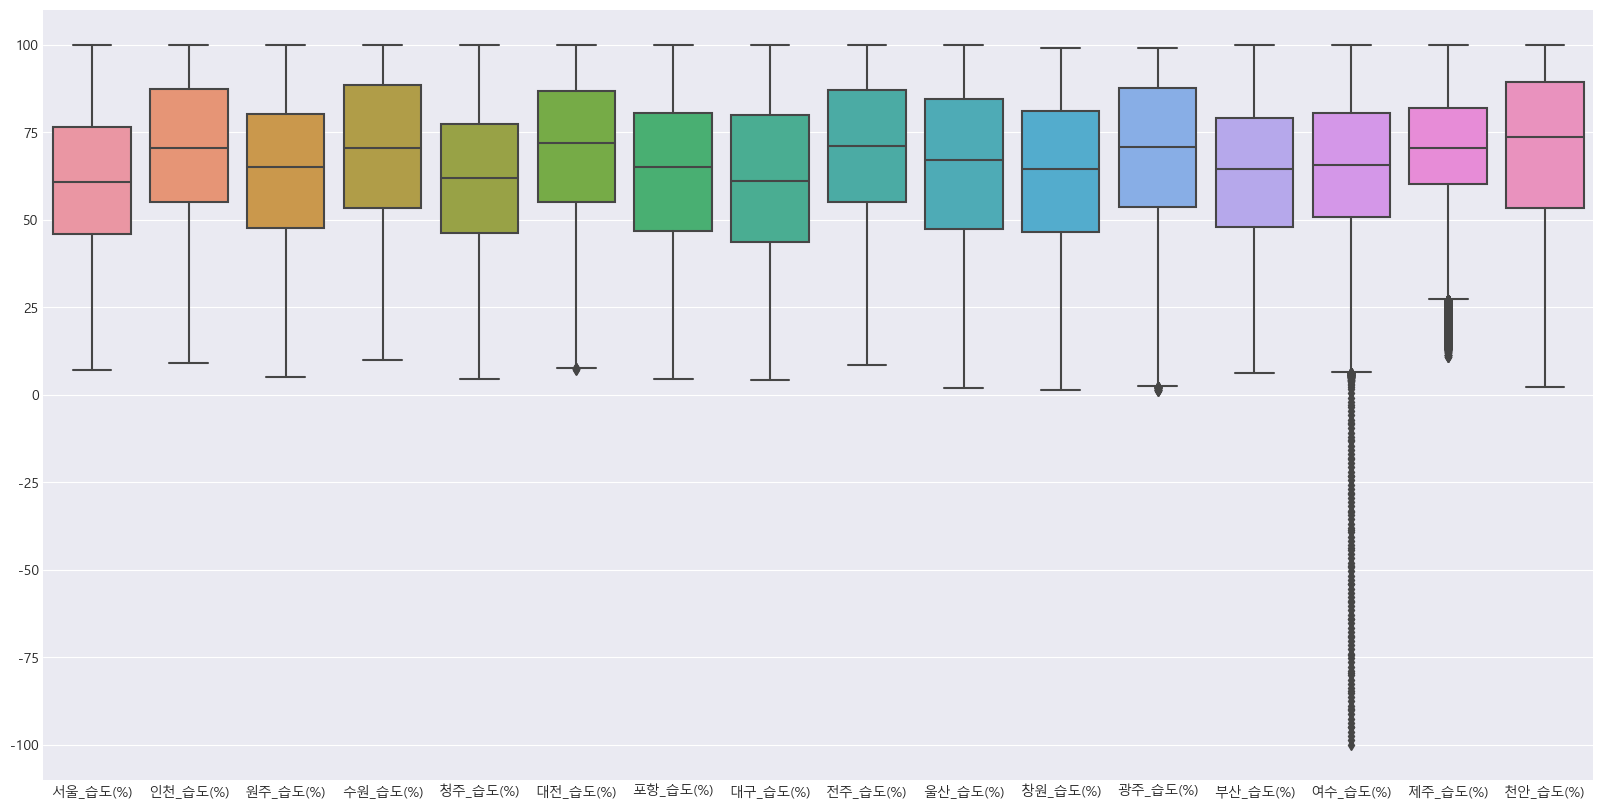

In [46]:
plt.figure(figsize=(20,10))
sns.boxplot(df_by_weather_info[6])
plt.show()

- 여수 처리 필요

In [47]:
df.loc[df['여수_습도(%)'] < 0, '여수_습도(%)']

일시
2017-03-22 12:00:00    -2.796429
2017-03-22 12:05:00    -7.907143
2017-03-22 12:10:00   -13.017857
2017-03-22 12:15:00   -18.128571
2017-03-22 12:20:00   -23.239286
                         ...    
2017-03-22 19:55:00    -5.804762
2017-03-22 20:00:00    -4.566667
2017-03-22 20:05:00    -3.328571
2017-03-22 20:10:00    -2.090476
2017-03-22 20:15:00    -0.852381
Name: 여수_습도(%), Length: 100, dtype: float64

In [48]:
df.loc['2017-03-22', '여수_습도(%)'] = df.loc['2017-03-21', '여수_습도(%)'].values

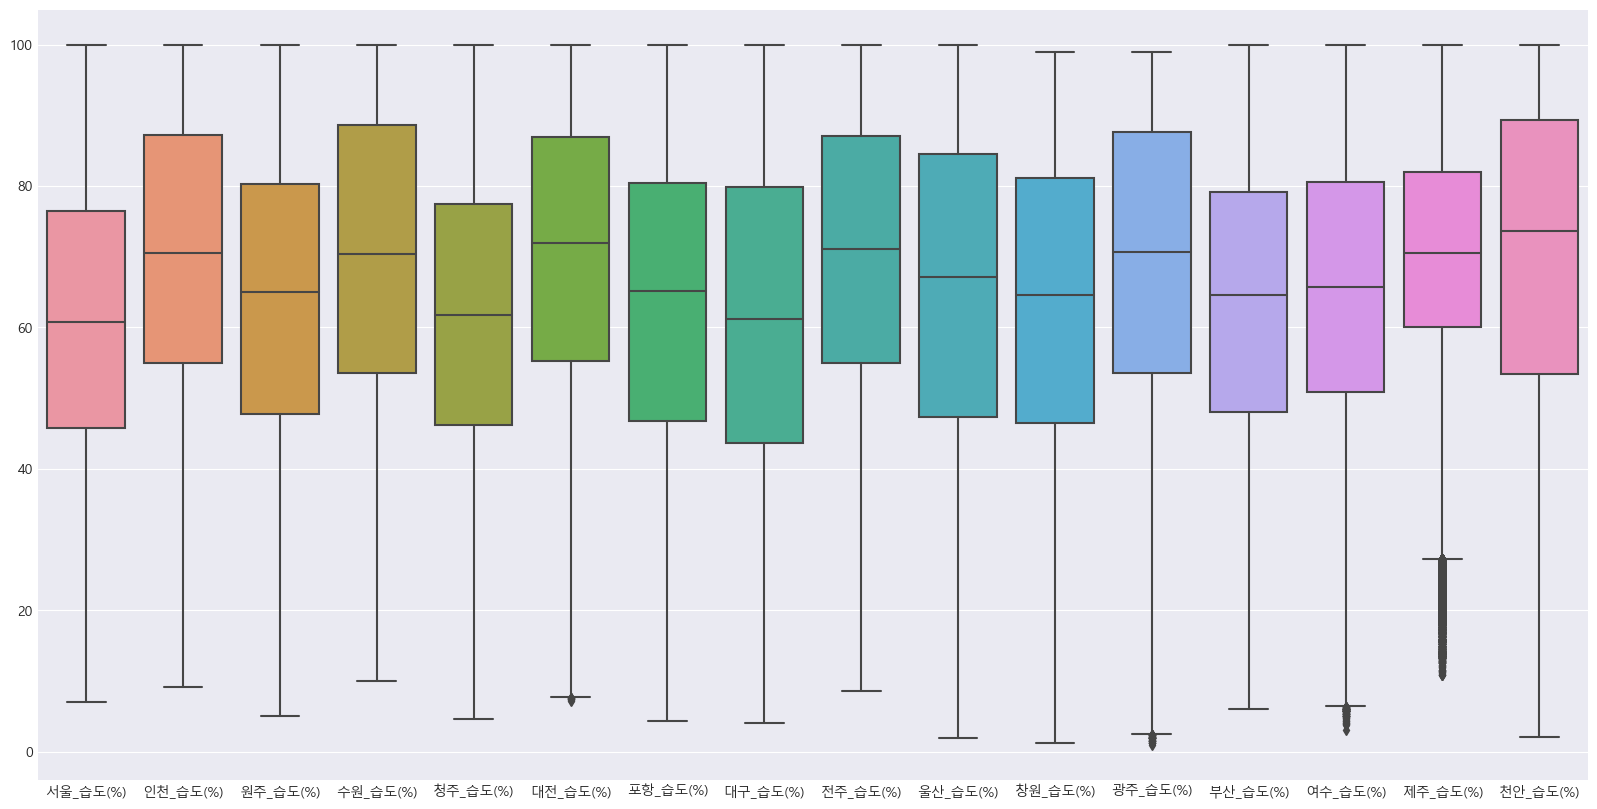

In [49]:
plt.figure(figsize=(20,10))
sns.boxplot(df.iloc[:,[9*i+6 for i in range(16)]])
plt.show()

### 일사

In [50]:
df.iloc[:,[9*i+7 for i in range(16)]].describe().round(1)

,서울_일사(MJ/m^2),인천_일사(MJ/m^2),원주_일사(MJ/m^2),수원_일사(MJ/m^2),청주_일사(MJ/m^2),대전_일사(MJ/m^2),포항_일사(MJ/m^2),대구_일사(MJ/m^2),전주_일사(MJ/m^2),울산_일사(MJ/m^2),창원_일사(MJ/m^2),광주_일사(MJ/m^2),부산_일사(MJ/m^2),여수_일사(MJ/m^2),제주_일사(MJ/m^2),천안_일사(MJ/m^2)
count,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0
mean,6.2,6.3,6.7,6.2,6.7,7.3,6.3,7.2,6.8,-0.2,5.3,7.2,7.3,5.4,6.4,16.1
std,7.1,7.2,7.6,7.1,7.6,8.2,7.2,7.9,7.7,3.6,7.6,7.9,8.0,8.2,7.8,20.3
min,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.0,0.0,0.0,0.0,-10.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0
50%,3.4,3.5,3.7,3.5,3.8,4.1,3.3,4.4,3.8,0.0,0.3,4.2,4.2,0.2,2.8,0.0
75%,10.8,10.8,11.7,10.8,11.5,12.6,10.9,12.6,11.9,0.1,9.8,12.7,12.7,9.4,11.2,44.3
max,31.5,30.2,31.0,45.0,31.4,33.0,45.0,31.4,31.7,21.8,44.8,32.4,45.0,45.0,30.6,45.0


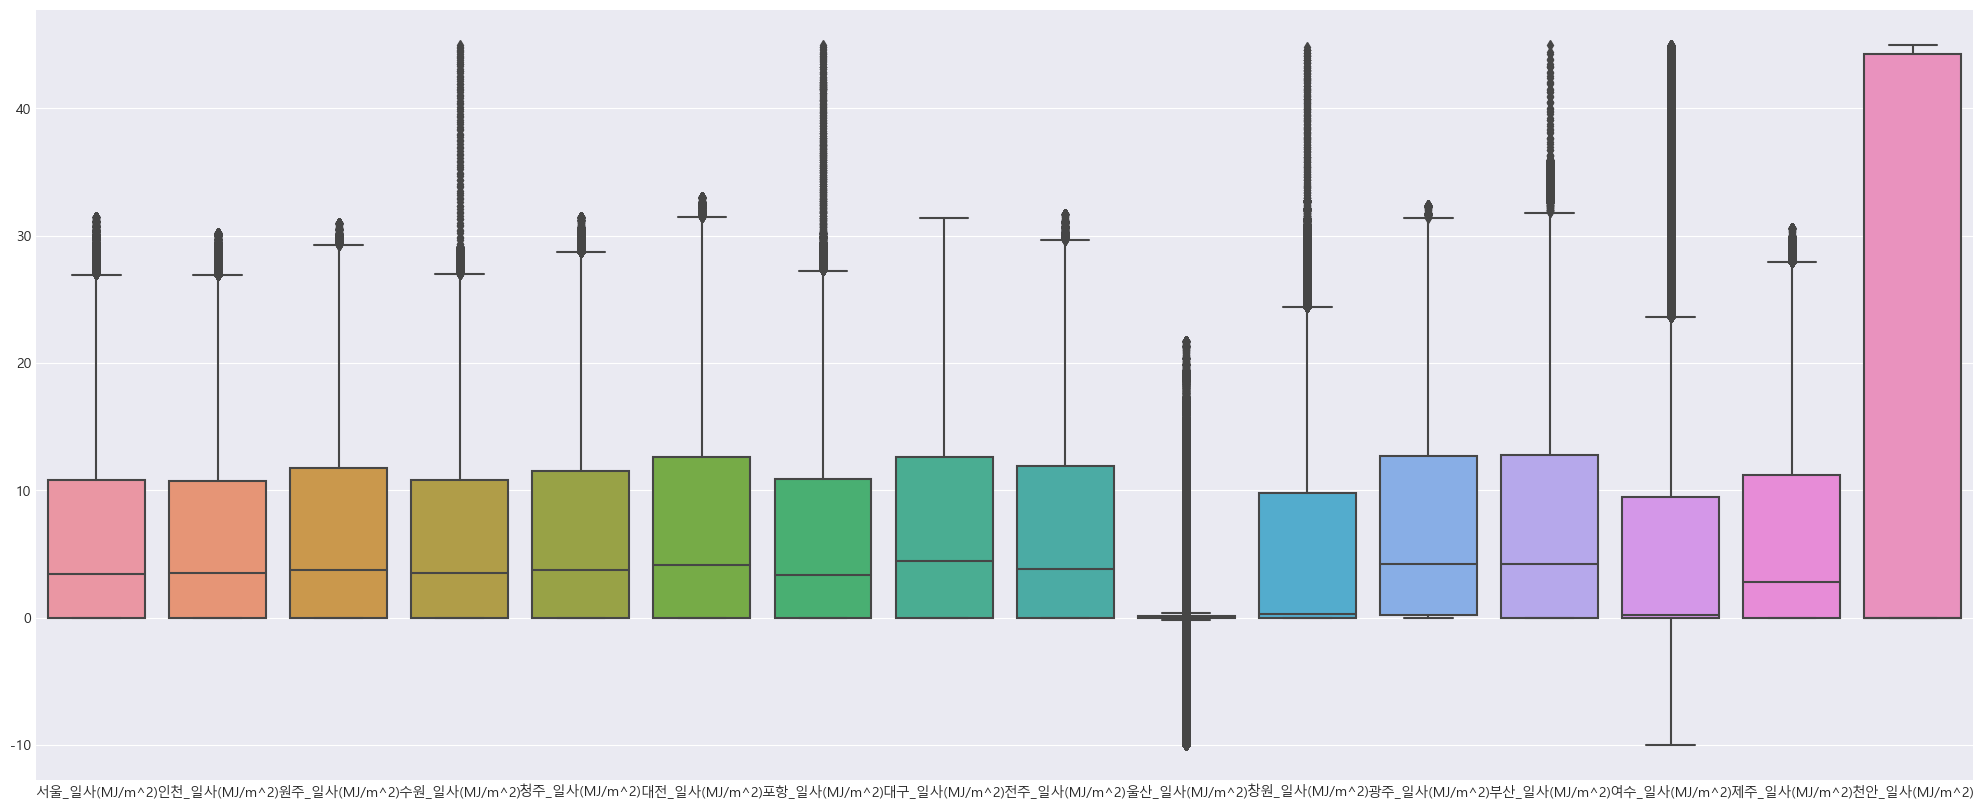

In [51]:
plt.figure(figsize=(25,10))
sns.boxplot(df.iloc[:,[9*i+7 for i in range(16)]])
plt.show()

- 울산과 천안의 경우, 일사 데이터가 대체된 경우가 많으므로, 위치가 비슷한 지역으로 대체
    - 울산 -> 포항
    - 천안 -> 청주
  
- 여수 처리 필요

### 일조

In [52]:
df.iloc[:,[9*i+8 for i in range(16)]].describe().round(1)

,서울_일조(Sec),인천_일조(Sec),원주_일조(Sec),수원_일조(Sec),청주_일조(Sec),대전_일조(Sec),포항_일조(Sec),대구_일조(Sec),전주_일조(Sec),울산_일조(Sec),창원_일조(Sec),광주_일조(Sec),부산_일조(Sec),여수_일조(Sec),제주_일조(Sec),천안_일조(Sec)
count,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0,1135871.0
mean,11310.7,11938.1,10828.0,11335.6,11312.7,11425.5,11744.4,11723.7,10566.5,11679.6,11708.6,10728.5,12056.5,11835.6,8660.5,10727.6
std,13544.7,14003.1,13093.7,13557.5,13344.4,13544.3,13893.6,13665.7,12952.7,13720.6,13655.1,13120.3,14093.5,13975.0,12281.4,12915.5
min,-999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4140.0,4740.0,3780.0,4140.0,4500.0,4440.0,4500.0,4740.0,3420.0,4620.0,4680.0,3480.0,4740.0,4380.0,900.0,3874.0
75%,22020.0,23460.0,20940.0,22020.0,22020.0,22200.0,23100.0,22920.0,20280.0,23100.0,23340.0,20640.0,23940.0,23640.0,15300.0,20606.0
max,49080.0,50520.0,49560.0,54000.0,48840.0,49860.0,54000.0,54000.0,48660.0,48480.0,46920.0,48720.0,47100.0,49080.0,48708.0,49560.0


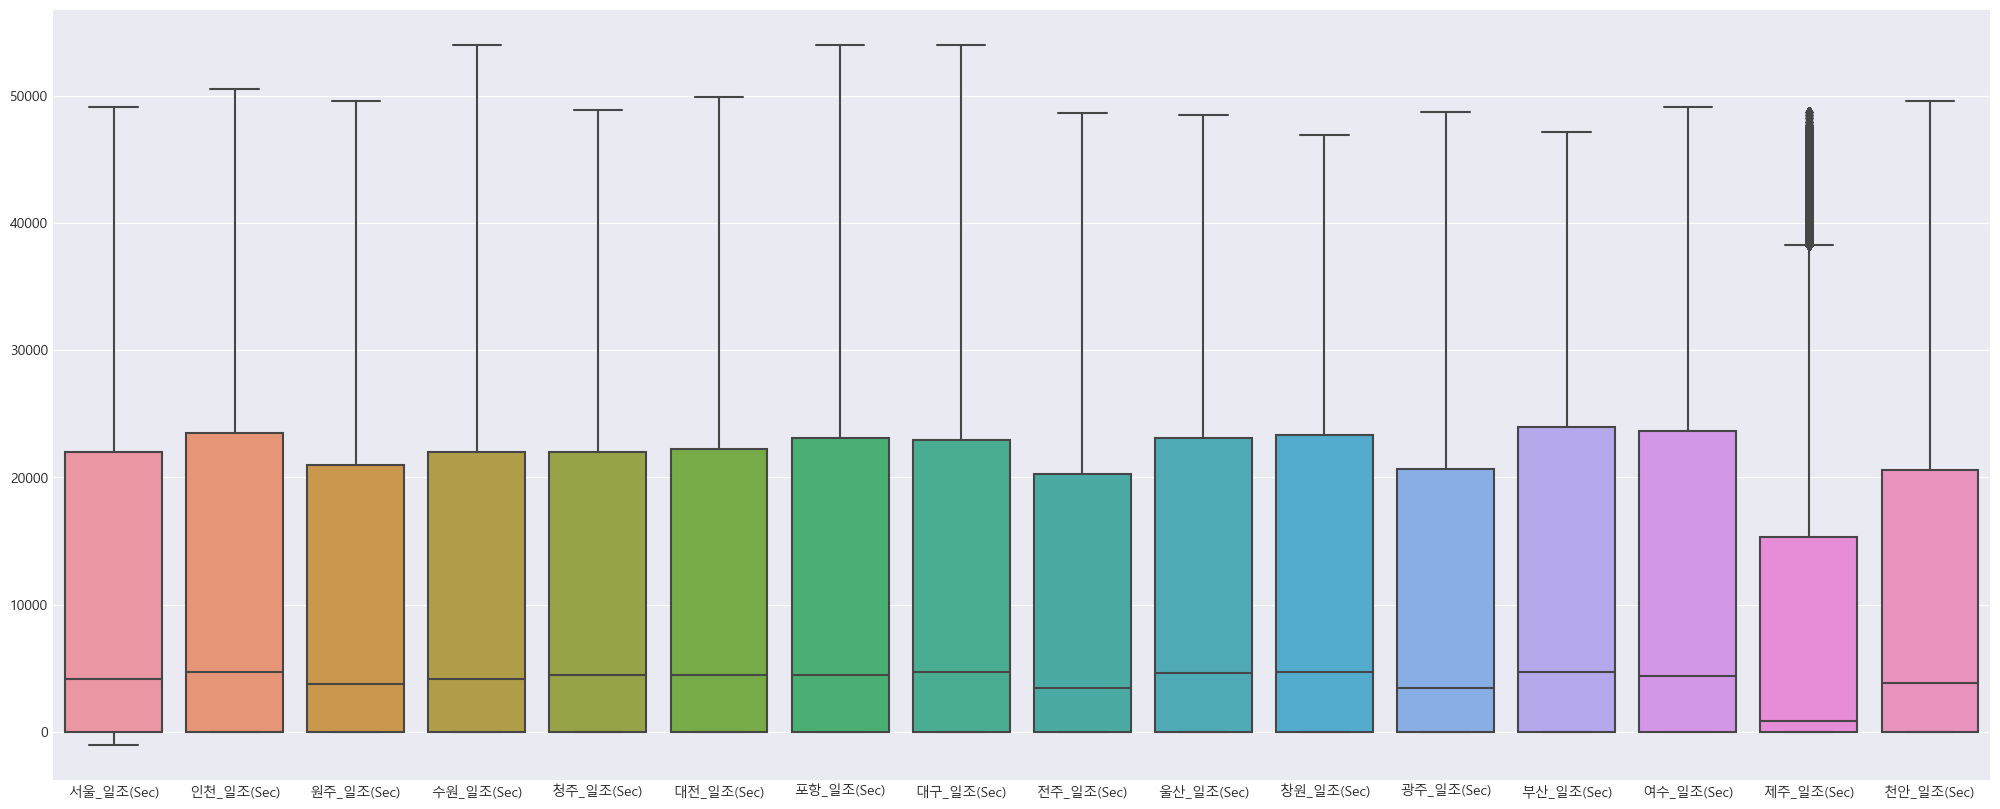

In [53]:
plt.figure(figsize=(25,10))
sns.boxplot(df.iloc[:,[9*i+8 for i in range(16)]])
plt.show()

- 서울 처리 필요

In [54]:
df.loc[df['서울_일조(Sec)'] < 0, '서울_일조(Sec)']

일시
2017-11-05 13:00:00   -999.000000
2017-11-05 13:05:00   -991.488722
2017-11-05 13:10:00   -983.977444
2017-11-05 13:15:00   -976.466165
2017-11-05 13:20:00   -968.954887
                          ...    
2017-11-05 23:40:00    -37.556391
2017-11-05 23:45:00    -30.045113
2017-11-05 23:50:00    -22.533835
2017-11-05 23:55:00    -15.022556
2017-11-06 00:00:00     -7.511278
Name: 서울_일조(Sec), Length: 133, dtype: float64

In [55]:
df.loc['2017-11-05', '서울_일조(Sec)'] = df.loc['2017-11-04', '서울_일조(Sec)'].values

## 다중 변수 분석

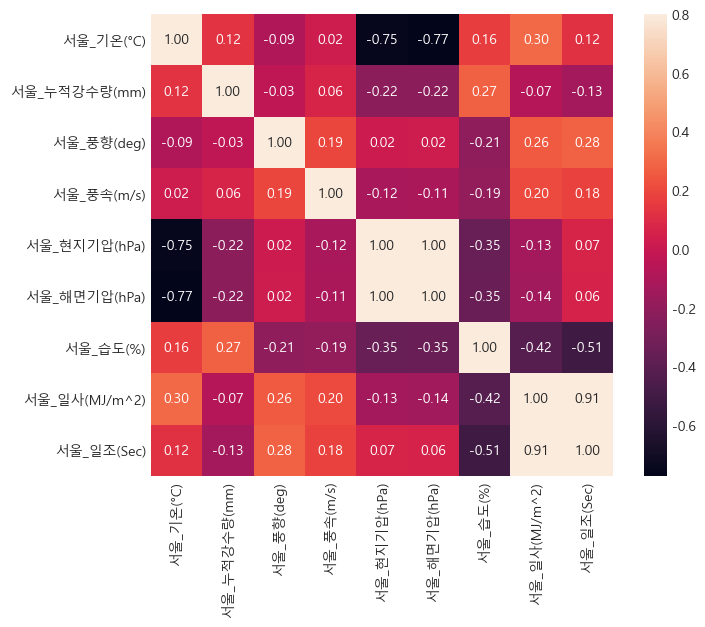

In [56]:
def draw_corrmat(df):
    y_corrmat = df.corr()
    f, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(y_corrmat, vmax=.8, annot=True, fmt='.2f', square=True)

draw_corrmat(df.iloc[:,0:9])

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.iloc[:,0:9].values, i) for i in range(df.iloc[:,0:9].shape[1])]
vif["features"] = df.iloc[:,0:9].columns
vif.round(2)

,VIF Factor,features
0,1.012200e+02,서울_기온(°C)
1,1.150000e+00,서울_누적강수량(mm)
2,4.500000e+00,서울_풍향(deg)
3,4.110000e+00,서울_풍속(m/s)
4,2.125630e+08,서울_현지기압(hPa)
5,2.123432e+08,서울_해면기압(hPa)
6,1.614000e+01,서울_습도(%)
7,1.348000e+01,서울_일사(MJ/m^2)
8,1.255000e+01,서울_일조(Sec)


- 현지기압, 해면기압 중 1개의 변수는 제거할 필요가 있음
    - 높은 상관관계와 VIF    
    - 해면기압 제거

- 일사, 일조 중 1개의 변수도 제거
    - 일사 제거

In [63]:
vif = pd.DataFrame()
df2 = df.iloc[:,0:9].drop("서울_해면기압(hPa)", axis=1)
vif["VIF Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif["features"] = df2.columns
vif

,VIF Factor,features
0,3.419087,서울_기온(°C)
1,1.152642,서울_누적강수량(mm)
2,4.501557,서울_풍향(deg)
3,4.109055,서울_풍속(m/s)
4,25.520744,서울_현지기압(hPa)
5,16.136371,서울_습도(%)
6,13.482397,서울_일사(MJ/m^2)
7,12.544966,서울_일조(Sec)


In [72]:
vif = pd.DataFrame()
df3 = df2.drop("서울_일사(MJ/m^2)", axis=1)
vif["VIF Factor"] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif["features"] = df3.columns
vif

,VIF Factor,features
0,2.683877,서울_기온(°C)
1,1.150659,서울_누적강수량(mm)
2,4.482332,서울_풍향(deg)
3,4.069100,서울_풍속(m/s)
4,25.180292,서울_현지기압(hPa)
5,16.135929,서울_습도(%)
6,2.592224,서울_일조(Sec)


In [65]:
df.isnull().sum().sort_values().tail(10)

대전_누적강수량(mm)     0
대전_풍속(m/s)       0
대전_현지기압(hPa)     0
대전_해면기압(hPa)     0
대전_습도(%)         0
대전_일사(MJ/m^2)    0
대전_일조(Sec)       0
포항_기온(°C)        0
대전_풍향(deg)       0
요일3              0
dtype: int64

In [77]:
df.columns[(df.columns.str.contains('해면기압')) | (df.columns.str.contains('일사'))]

Index(['서울_일사(MJ/m^2)', '인천_일사(MJ/m^2)', '원주_일사(MJ/m^2)', '수원_일사(MJ/m^2)',
       '청주_일사(MJ/m^2)', '대전_일사(MJ/m^2)', '포항_일사(MJ/m^2)', '대구_일사(MJ/m^2)',
       '전주_일사(MJ/m^2)', '울산_일사(MJ/m^2)', '창원_일사(MJ/m^2)', '광주_일사(MJ/m^2)',
       '부산_일사(MJ/m^2)', '여수_일사(MJ/m^2)', '제주_일사(MJ/m^2)', '천안_일사(MJ/m^2)'],
      dtype='object')

In [78]:
df.drop(df.columns[df.columns.str.contains('해면기압') | df.columns.str.contains('일사')], axis=1, inplace=True)

In [79]:
df

,서울_기온(°C),서울_누적강수량(mm),서울_풍향(deg),서울_풍속(m/s),서울_현지기압(hPa),서울_습도(%),서울_일조(Sec),인천_기온(°C),인천_누적강수량(mm),인천_풍향(deg),...,천안_일조(Sec),공급능력(MW),현재수요(MW),공급예비력(MW),운영예비력(MW),요일,is_holiday_or_weekend,요일1,요일2,요일3
일시,,,,,,,,,,,,,,,,,,,,,
2012-06-01 00:05:00,18.3,0.0,21.4,1.4,1006.4,70.7,0.0,17.1,0.0,206.5,...,0.0,64355.0,51342.53,13012.47,13012.47,4,0,1,0,1
2012-06-01 00:10:00,18.0,0.0,11.6,1.0,1006.3,72.1,0.0,17.0,0.0,209.0,...,0.0,64355.0,51583.17,12771.83,12771.83,4,0,1,0,1
2012-06-01 00:15:00,17.9,0.0,6.2,1.2,1006.2,72.7,0.0,17.0,0.0,202.7,...,0.0,64355.0,51631.69,12723.31,12723.31,4,0,1,0,1
2012-06-01 00:20:00,17.9,0.0,20.1,1.0,1006.1,72.8,0.0,17.0,0.0,30.3,...,0.0,64355.0,51252.66,13102.35,13102.35,4,0,1,0,1
2012-06-01 00:25:00,17.8,0.0,18.0,0.8,1006.1,72.8,0.0,16.9,0.0,31.5,...,0.0,64355.0,50888.38,13466.62,13466.62,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-19 23:35:00,6.4,0.0,254.8,2.4,1007.8,70.4,39900.0,1.9,0.0,286.1,...,39384.0,83627.7,58627.20,25000.50,10477.00,6,1,1,1,1
2023-03-19 23:40:00,6.4,0.0,250.4,2.2,1007.8,70.5,39900.0,1.9,0.0,305.8,...,39384.0,83622.0,57941.20,25680.70,10712.70,6,1,1,1,1
2023-03-19 23:45:00,6.3,0.0,244.6,2.1,1007.7,70.1,39900.0,1.8,0.0,315.0,...,39384.0,83618.9,57726.20,25892.70,10759.20,6,1,1,1,1


In [80]:
df.to_csv('weather_electric_data_0707.csv')